# Loan Prediction

#### Import Libraries 

In [86]:
import pandas as pd
pd.set_option("display.max_columns",100)
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

#### Import data

In [2]:
df=pd.read_csv('LoansTrainingSet.csv')

#### EDA - Exploratory Data Analysis

In [4]:
df.head(100)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,000025bb-5694-4cff-b17d-192b1a98ba44,5ebc8bb1-5eb9-4404-b11b-a6eebc401a19,Fully Paid,11520,Short Term,741.0,10+ years,Home Mortgage,33694.0,Debt Consolidation,$584.03,12.3,41.0,10,0,6760,16056,0.0,0.0
1,00002c49-3a29-4bd4-8f67-c8f8fbc1048c,927b388d-2e01-423f-a8dc-f7e42d668f46,Fully Paid,3441,Short Term,734.0,4 years,Home Mortgage,42269.0,other,"$1,106.04",26.3,NaN,17,0,6262,19149,0.0,0.0
2,00002d89-27f3-409b-aa76-90834f359a65,defce609-c631-447d-aad6-1270615e89c4,Fully Paid,21029,Short Term,747.0,10+ years,Home Mortgage,90126.0,Debt Consolidation,"$1,321.85",28.8,NaN,5,0,20967,28335,0.0,0.0
3,00005222-b4d8-45a4-ad8c-186057e24233,070bcecb-aae7-4485-a26a-e0403e7bb6c5,Fully Paid,18743,Short Term,747.0,10+ years,Own Home,38072.0,Debt Consolidation,$751.92,26.2,NaN,9,0,22529,43915,0.0,0.0
4,0000757f-a121-41ed-b17b-162e76647c1f,dde79588-12f0-4811-bab0-e2b07f633fcd,Fully Paid,11731,Short Term,746.0,4 years,Rent,50025.0,Debt Consolidation,$355.18,11.5,NaN,12,0,17391,37081,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,001a853a-9c59-4450-8850-2df07ff2b115,34876ca9-b51e-4b72-854c-4b298d5debd0,Fully Paid,23451,Short Term,742.0,5 years,Home Mortgage,127450.0,Debt Consolidation,"$1,954.24",20.4,NaN,13,0,20561,68767,0.0,0.0
101,001a909a-f61d-49ae-a243-ff596456d516,6f2514e9-2676-4d9a-9fe0-905f90377bee,Fully Paid,10444,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$115.36,21.4,39.0,5,0,2762,10543,0.0,0.0
102,001a99b9-0453-471e-a934-f5eab0472c18,933bb9bd-a126-4580-9ba2-efe5c932a78e,Fully Paid,99999999,Short Term,734.0,4 years,Home Mortgage,95580.0,Home Improvements,$433.30,13.7,NaN,10,1,3944,7345,1.0,0.0
103,001afb28-3ad2-4a6e-afff-4701e11320f8,03972b64-c874-4d1a-9026-09803d903992,Fully Paid,4896,Short Term,711.0,< 1 year,Rent,36970.0,Debt Consolidation,$274.81,8.0,NaN,2,0,375,600,0.0,0.0


In [5]:
df.shape

(240374, 19)

In [6]:
df.sample(100)

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
1492,017cf363-5fd3-45e5-8855-8992e924ca6b,fabbf430-4524-42c7-9ed6-dd663c614896,Fully Paid,8453,Short Term,NaN,3 years,Rent,NaN,Debt Consolidation,"$1,306.77",18.9,75.0,8,1,8945,16322,1.0,0.0
206370,cd6b71a5-9b2f-4dde-af6d-bfda0c4ca919,4b0be299-c6d6-4bbf-b1a2-ce680a702aff,Fully Paid,21870,Long Term,NaN,6 years,Rent,NaN,Debt Consolidation,"$1,277.56",12.0,NaN,13,0,21532,28786,0.0,0.0
134853,861cc2f8-07a9-4533-a720-fcffe1ed3e6f,6ed47d65-7595-477f-8d19-e05c171f19b3,Fully Paid,99999999,Short Term,731.0,5 years,Home Mortgage,39636.0,Debt Consolidation,$333.61,10.8,NaN,9,0,4628,11400,0.0,0.0
191027,bdef17f0-56e9-4c12-9966-d3038669d924,686d4231-61a7-4d6a-84df-e8265b90b6cd,Charged Off,4399,Short Term,719.0,< 1 year,Rent,79186.0,Medical Bills,"$2,289.78",20.9,15.0,17,0,14346,16760,0.0,0.0
223134,de0ad0fc-7620-4b1c-88b8-84d49fc594dd,f6d48156-75e0-4f67-9bad-12f31838bd88,Fully Paid,13195,Short Term,740.0,2 years,Home Mortgage,34986.0,Debt Consolidation,$300.30,18.5,NaN,6,0,13275,14397,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132817,8429aa33-12b4-4ba0-b418-92fb24396cac,04844d32-5e30-452f-9553-556fb94d9bb3,Charged Off,34136,Short Term,NaN,10+ years,Rent,NaN,Debt Consolidation,$345.18,25.9,41.0,8,5,3951,58103,0.0,5.0
169325,a858f790-f0f8-4400-805f-9b22a5913ec8,a78f5a2e-ed96-4d8f-9703-dba322bde59b,Fully Paid,14156,Short Term,745.0,7 years,Home Mortgage,64436.0,Debt Consolidation,$403.26,19.5,44.0,6,0,13694,23131,0.0,0.0
243851,f2cb665c-4a0e-4e4b-ad0f-4d41214a7cd5,bc7da65f-5155-4bf9-82ad-f4eb17e69a78,Fully Paid,99999999,Short Term,725.0,10+ years,Home Mortgage,66957.0,Debt Consolidation,$820.22,18.0,NaN,11,0,23903,27286,0.0,0.0
5075,051a4aa5-1bed-4150-9f72-2d7922a49384,1103f7ab-8a48-46c9-a1a4-9d3fd0fb3673,Fully Paid,14027,Short Term,742.0,10+ years,Home Mortgage,98186.0,Debt Consolidation,"$2,544.66",23.5,53.0,13,0,9485,24830,0.0,0.0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 240374 entries, 0 to 256983
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       240374 non-null  object 
 1   Customer ID                   240374 non-null  object 
 2   Loan Status                   240374 non-null  object 
 3   Current Loan Amount           240374 non-null  int64  
 4   Term                          240374 non-null  object 
 5   Credit Score                  181028 non-null  float64
 6   Years in current job          229930 non-null  object 
 7   Home Ownership                240374 non-null  object 
 8   Annual Income                 181028 non-null  float64
 9   Purpose                       240374 non-null  object 
 10  Monthly Debt                  240374 non-null  object 
 11  Years of Credit History       240374 non-null  float64
 12  Months since last delinquent  108947 non-null  fl

In [15]:
df.describe()

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
count,1.700690e+05,170069.000000,170069.000000,170069.000000,170069.000000,76764.000000,170069.000000,170069.000000,170069.000000,1.700660e+05,169718.000000,170057.000000
mean,2.002577e+07,1041.873651,67097.575578,925.259126,18.188932,35.085600,11.037667,0.157618,14598.970424,3.258407e+04,0.112970,0.025715
std,4.000575e+07,1372.342809,30829.110184,562.593768,7.014738,21.853142,4.946960,0.459197,15237.863488,3.100856e+05,0.340171,0.238665
min,5.050000e+02,585.000000,0.000000,0.000000,3.400000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,8.782000e+03,714.000000,44237.000000,522.490000,13.500000,17.000000,8.000000,0.000000,5873.000000,1.268700e+04,0.000000,0.000000
50%,1.496000e+04,733.000000,60882.000000,828.070000,16.900000,32.000000,10.000000,0.000000,10861.000000,2.148750e+04,0.000000,0.000000
75%,2.883900e+04,743.000000,84329.000000,1219.600000,21.600000,51.000000,14.000000,0.000000,18808.000000,3.549000e+04,0.000000,0.000000
max,1.000000e+08,7260.000000,171343.000000,4872.290000,70.500000,176.000000,76.000000,11.000000,818209.000000,9.670825e+07,7.000000,11.000000


In [16]:
df.corr(numeric_only=True)

,Current Loan Amount,Credit Score,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
Current Loan Amount,1.000000,-0.115122,0.025889,-0.004699,0.017521,0.003316,-0.003789,0.000334,0.002060,0.001750,0.003596,-0.002601
Credit Score,-0.115122,1.000000,-0.034663,0.024546,-0.023950,-0.014691,0.016128,0.004645,0.000624,-0.005855,0.000423,0.005133
Annual Income,0.025889,-0.034663,1.000000,0.579852,0.202087,-0.073590,0.215537,-0.023928,0.357189,0.045540,-0.054103,0.035283
Monthly Debt,-0.004699,0.024546,0.579852,1.000000,0.176954,-0.047644,0.424019,-0.055603,0.466259,0.031432,-0.073620,0.011514
Years of Credit History,0.017521,-0.023950,0.202087,0.176954,1.000000,-0.037348,0.123855,0.063514,0.219587,0.028942,0.067561,0.017248
Months since last delinquent,0.003316,-0.014691,-0.073590,-0.047644,-0.037348,1.000000,-0.035312,0.093723,-0.014560,0.001794,0.115301,0.006346
Number of Open Accounts,-0.003789,0.016128,0.215537,0.424019,0.123855,-0.035312,1.000000,-0.013669,0.252137,0.031409,-0.020486,0.002497
Number of Credit Problems,0.000334,0.004645,-0.023928,-0.055603,0.063514,0.093723,-0.013669,1.000000,-0.126159,-0.013694,0.767548,0.573604
Current Credit Balance,0.002060,0.000624,0.357189,0.466259,0.219587,-0.014560,0.252137,-0.126159,1.000000,0.135978,-0.138878,-0.018609
Maximum Open Credit,0.001750,-0.005855,0.045540,0.031432,0.028942,0.001794,0.031409,-0.013694,0.135978,1.000000,-0.015011,-0.002002


In [17]:
df.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                        0
Years in current job             7520
Home Ownership                      0
Annual Income                       0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    93305
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 3
Bankruptcies                      351
Tax Liens                          12
dtype: int64

#### Outliers (Extreme Values)

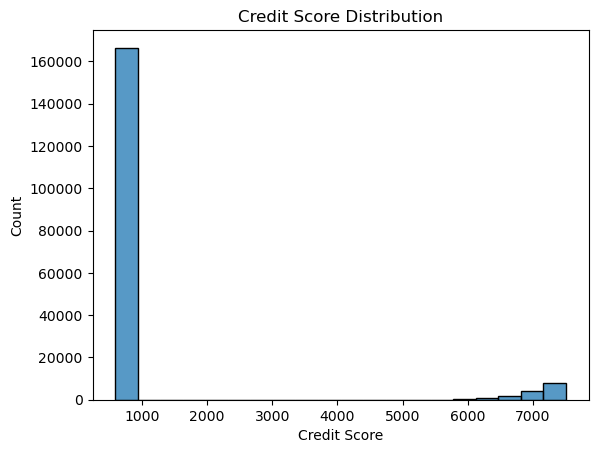

In [8]:
sns.histplot(df['Credit Score'], bins=20)
plt.title('Credit Score Distribution')
plt.show()

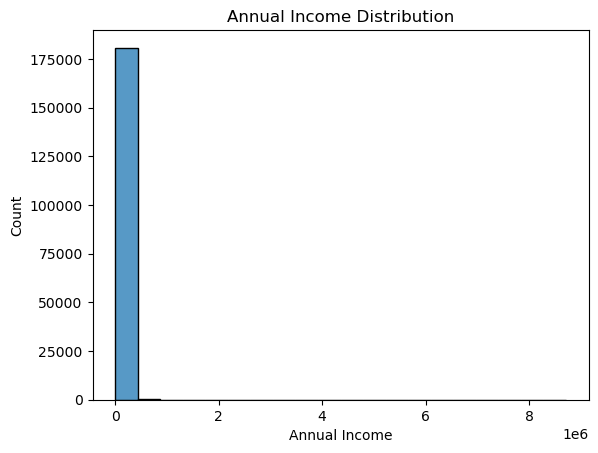

In [9]:
sns.histplot(df['Annual Income'], bins=20)
plt.title('Annual Income Distribution')
plt.show()

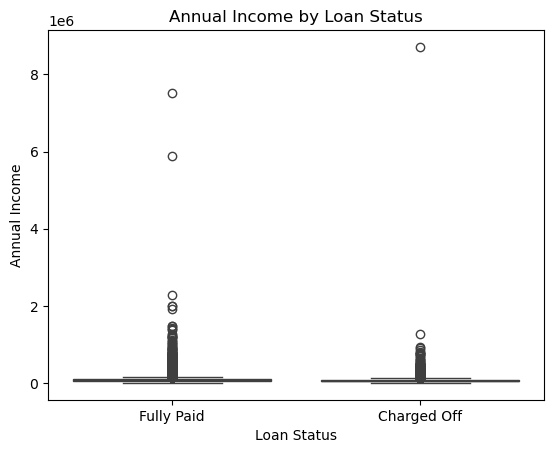

In [10]:
sns.boxplot(x='Loan Status', y='Annual Income', data=df)
plt.title('Annual Income by Loan Status')
plt.show()

In [11]:
outliers=df.quantile(q=.97, numeric_only=True)

In [12]:
df=df[(df['Credit Score']<outliers['Credit Score'])]
df=df[(df['Annual Income']<outliers['Annual Income'])]

#### Feature Engineering

In [95]:
df=df.drop_duplicates()

In [13]:
df['Monthly Debt'] = df['Monthly Debt'].replace('[\$,]', '', regex=True).astype(float)

In [14]:
df['Maximum Open Credit'] = pd.to_numeric(
    df['Maximum Open Credit'].replace('[\$,]', '', regex=True), errors='coerce'
)

In [18]:
df['Credit Score'] = df['Credit Score'].fillna(df['Credit Score'].median())

In [19]:
df['Maximum Open Credit'] = df['Maximum Open Credit'].fillna(df['Maximum Open Credit'].median())

In [20]:
df['Years in current job'] = df['Years in current job'].fillna(df['Years in current job'].mode()[0])

In [21]:
df['Annual Income'] = df['Annual Income'].fillna(df['Annual Income'].median())

In [22]:
df['Months since last delinquent'] = df['Months since last delinquent'].fillna(df['Months since last delinquent'].median())

In [23]:
df['Bankruptcies'] = df['Bankruptcies'].fillna(df['Bankruptcies'].median())

In [24]:
df['Tax Liens'] = df['Tax Liens'].fillna(df['Tax Liens'].median())

In [75]:
df['Debt-to-Income Ratio'] = df['Monthly Debt'] / df['Annual Income']

In [76]:
df['Credit Utilization'] = df['Current Credit Balance'] / df['Maximum Open Credit']

In [25]:
categorical_columns = ['Term', 'Home Ownership', 'Purpose', 'Loan Status']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [27]:
target_column = 'Loan Status_Fully Paid'
x = df.drop(columns=['Loan ID','Customer ID','Years in current job',target_column])
y = df[target_column]

In [28]:
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.20, random_state=42)

In [29]:
x_train = pd.get_dummies(x_train, drop_first=True, sparse=True)

#### Modelling

In [30]:
g=GaussianNB()
b=BernoulliNB()

In [31]:
g.fit(x_train,y_train)

GaussianNB()

In [32]:
gtahmin=g.predict(x_test)

In [33]:
accuracy_score(gtahmin,y_test)

0.442494267066502

In [34]:
confusion_matrix(gtahmin,y_test)

array([[ 8074, 18950],
       [   13,  6977]], dtype=int64)

In [35]:
import seaborn as sns

<Axes: >

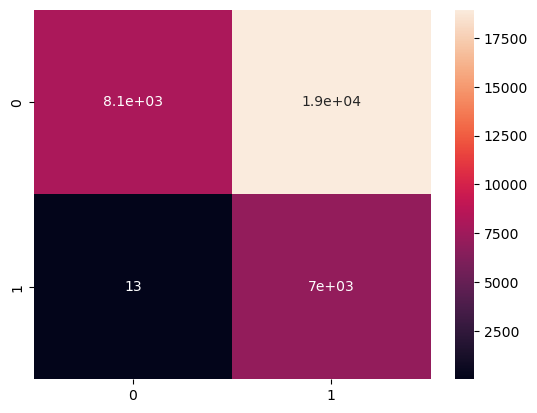

In [36]:
sns.heatmap(confusion_matrix(gtahmin,y_test), annot=True)

In [37]:
print(classification_report(gtahmin,y_test))

              precision    recall  f1-score   support

       False       1.00      0.30      0.46     27024
        True       0.27      1.00      0.42      6990

    accuracy                           0.44     34014
   macro avg       0.63      0.65      0.44     34014
weighted avg       0.85      0.44      0.45     34014



In [38]:
b.fit(x_train,y_train)

BernoulliNB()

In [39]:
btahmin=b.predict(x_test)

In [40]:
accuracy_score(btahmin,y_test)

0.7622155582995237

In [41]:
confusion_matrix(btahmin,y_test)

array([[  113,   114],
       [ 7974, 25813]], dtype=int64)

In [42]:
print(classification_report(btahmin,y_test))

              precision    recall  f1-score   support

       False       0.01      0.50      0.03       227
        True       1.00      0.76      0.86     33787

    accuracy                           0.76     34014
   macro avg       0.50      0.63      0.45     34014
weighted avg       0.99      0.76      0.86     34014



In [43]:
l=LogisticRegression()

In [44]:
l.fit(x_train,y_train)

LogisticRegression()

In [45]:
ltahmin=l.predict(x_test)

In [46]:
accuracy_score(ltahmin,y_test)

0.8123125771741048

In [47]:
print(classification_report(ltahmin,y_test))

              precision    recall  f1-score   support

       False       0.22      0.98      0.35      1781
        True       1.00      0.80      0.89     32233

    accuracy                           0.81     34014
   macro avg       0.61      0.89      0.62     34014
weighted avg       0.96      0.81      0.86     34014



In [48]:
confusion_matrix(ltahmin,y_test)

array([[ 1742,    39],
       [ 6345, 25888]], dtype=int64)

In [49]:
d=DecisionTreeClassifier()

In [50]:
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [51]:
dtahmin=d.predict(x_test)

In [52]:
accuracy_score(dtahmin,y_test)

0.7470747339330863

In [53]:
print(classification_report(dtahmin,y_test))

              precision    recall  f1-score   support

       False       0.50      0.47      0.48      8552
        True       0.83      0.84      0.83     25462

    accuracy                           0.75     34014
   macro avg       0.66      0.66      0.66     34014
weighted avg       0.74      0.75      0.74     34014



In [54]:
confusion_matrix(dtahmin,y_test)

array([[ 4018,  4534],
       [ 4069, 21393]], dtype=int64)

In [55]:
r=RandomForestClassifier()

In [56]:
r.fit(x_train,y_train)

RandomForestClassifier()

In [57]:
rtahmin=r.predict(x_test)

In [58]:
accuracy_score(rtahmin,y_test)

0.8203680837302287

In [59]:
confusion_matrix(rtahmin,y_test)

array([[ 2752,   775],
       [ 5335, 25152]], dtype=int64)

In [60]:
print(classification_report(rtahmin,y_test))

              precision    recall  f1-score   support

       False       0.34      0.78      0.47      3527
        True       0.97      0.83      0.89     30487

    accuracy                           0.82     34014
   macro avg       0.66      0.80      0.68     34014
weighted avg       0.90      0.82      0.85     34014



In [61]:
h=GradientBoostingClassifier()

In [62]:
h.fit(x_train,y_train)

GradientBoostingClassifier()

In [63]:
htahmin=h.predict(x_test)

In [64]:
accuracy_score(htahmin,y_test)

0.8187511024872112

In [65]:
confusion_matrix(htahmin,y_test)

array([[ 2416,   494],
       [ 5671, 25433]], dtype=int64)

In [66]:
print(classification_report(htahmin,y_test))

              precision    recall  f1-score   support

       False       0.30      0.83      0.44      2910
        True       0.98      0.82      0.89     31104

    accuracy                           0.82     34014
   macro avg       0.64      0.82      0.67     34014
weighted avg       0.92      0.82      0.85     34014



In [67]:
k= KNeighborsClassifier()

In [68]:
k.fit(x_train,y_train)

KNeighborsClassifier()

In [69]:
ktahmin=k.predict(x_test)

In [70]:
accuracy_score(ktahmin,y_test)

0.7773269830069971

In [71]:
confusion_matrix(ktahmin,y_test)

array([[ 2686,  2173],
       [ 5401, 23754]], dtype=int64)

In [72]:
print(classification_report(ktahmin,y_test))

              precision    recall  f1-score   support

       False       0.33      0.55      0.41      4859
        True       0.92      0.81      0.86     29155

    accuracy                           0.78     34014
   macro avg       0.62      0.68      0.64     34014
weighted avg       0.83      0.78      0.80     34014



#### Evaluating the trained mode

In [74]:
# Bize en yüksek oranlı sonucu verdiği için RandomForestClassifier modeli seçilmiştir
model=RandomForestClassifier()

In [80]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [81]:
y_pred = model.predict(x_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)

In [83]:
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.82


In [87]:
precision = precision_score(y_test, y_pred)

In [88]:
print(f"Precision: {precision:.2f}")

Precision: 0.83


In [89]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.2f}")

Recall: 0.97


In [90]:
f1 = f1_score(y_test, y_pred)
print(f"F1 Score: {f1:.2f}")

F1 Score: 0.89


In [92]:
roc_auc = roc_auc_score(y_test, model.predict_proba(x_test)[:, 1])
print(f"ROC-AUC Score: {roc_auc:.2f}")

ROC-AUC Score: 0.83


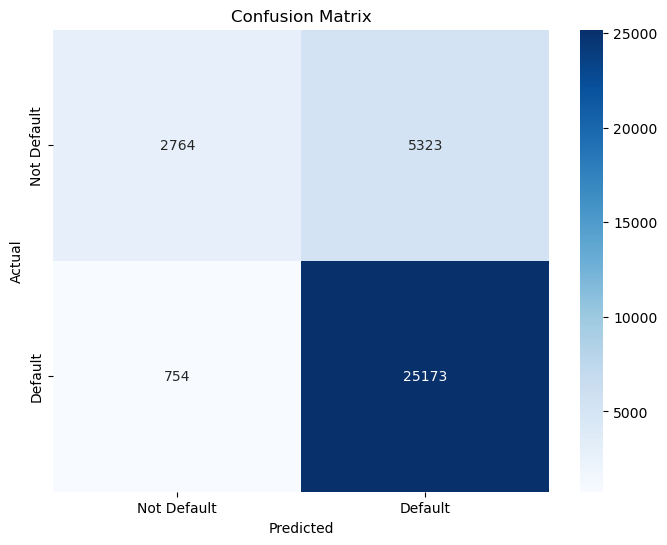

In [93]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Default', 'Default'], 
            yticklabels=['Not Default', 'Default'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

#### Use the trained model to predict who is a good customer on test data

In [97]:
y_pred = model.predict(x_test)

In [98]:
good_customers = x_test[y_pred == 0]  # Get features of good customers

In [99]:
# Assuming I have a Customer ID in my test set
good_customers_df = pd.DataFrame(good_customers)
good_customers_df['Predicted Status'] = y_pred[y_pred == 0]  # Add prediction

# Display the good customers
print("Good Customers:")
print(good_customers_df)

Good Customers:
        Current Loan Amount  Credit Score  Annual Income  Monthly Debt  \
107014                24230         691.0        55528.0        883.82   
216370                24559        6630.0       127913.0       1598.91   
42802                  4851        7090.0        17728.0        342.75   
183928                14572         606.0        47071.0       1110.08   
105960                 4933        7220.0        39460.0        937.18   
...                     ...           ...            ...           ...   
238143                34465         613.0        73969.0       1497.87   
22190                 14720         701.0        40888.0        981.31   
161527                34500         663.0       100541.0       2337.59   
188903                 6928         723.0        59382.0       1286.61   
175301                19968        7110.0        54912.0        704.70   

        Years of Credit History  Months since last delinquent  \
107014                     12.

In [100]:
good_customers_df.to_csv('good_customers_predictions.csv', index=False)

#### Questions to ask the customer when they apply for a loan

- What is your current credit score?
- How long have you been in your current job?
- What is your annual income?
- What is the purpose of the loan?
- How many open credit accounts do you currently have?
- Have you experienced any bankruptcies or tax liens in the past?
- What is your current debt-to-income ratio?
- How many credit problems have you encountered in the past?